# An Investigation of Keyhole Limpet Hemocyanin

<img src="Keyhole Limpet Nigel Phillips IMG_1389.JPG"><br>Source: Nigel Phillips[[3]](https://www.wildlifetrusts.org/wildlife-explorer/marine/sea-snails-and-sea-slugs/keyhole-limpet)

<b> Aldo Amaya: aamaya@brandeis.edu <br>
Dean Hoffer: hofferd@brandeis.edu <br>
Michael Ruggiero: michaelruggiero@brandeis.edu<br>
<br><em>September 22nd, 2020</em></b>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-2">Libraries Used</a></span></li><li><span><a href="#Part-1:-What-makes-KHLH-different?" data-toc-modified-id="Part-1:-What-makes-KHLH-different?-3">Part 1: What makes KHLH different?</a></span><ul class="toc-item"><li><span><a href="#Loading-Amino-Acids-Information-CSV" data-toc-modified-id="Loading-Amino-Acids-Information-CSV-3.1">Loading Amino Acids Information CSV</a></span></li><li><span><a href="#Fasta-Loading" data-toc-modified-id="Fasta-Loading-3.2">Fasta Loading</a></span><ul class="toc-item"><li><span><a href="#First-150-characters-of-RCSB-file" data-toc-modified-id="First-150-characters-of-RCSB-file-3.2.1">First 150 characters of RCSB file</a></span></li><li><span><a href="#Initial-Functions" data-toc-modified-id="Initial-Functions-3.2.2">Initial Functions</a></span></li><li><span><a href="#Load-the-fasta-files-/-multiprocessing" data-toc-modified-id="Load-the-fasta-files-/-multiprocessing-3.2.3">Load the fasta files / multiprocessing</a></span></li></ul></li><li><span><a href="#Example-kmer-protein-analysis" data-toc-modified-id="Example-kmer-protein-analysis-3.3">Example kmer protein analysis</a></span><ul class="toc-item"><li><span><a href="#What-is-the-function-of-the-HGM-kmer?" data-toc-modified-id="What-is-the-function-of-the-HGM-kmer?-3.3.1">What is the function of the HGM kmer?</a></span></li><li><span><a href="#ChimeraX-settings" data-toc-modified-id="ChimeraX-settings-3.3.2">ChimeraX settings</a></span></li><li><span><a href="#Oxygen-Carrying-Proteins" data-toc-modified-id="Oxygen-Carrying-Proteins-3.3.3">Oxygen Carrying Proteins</a></span></li></ul></li><li><span><a href="#Running-a-similar-analysis-on-KHLH-(4BED)" data-toc-modified-id="Running-a-similar-analysis-on-KHLH-(4BED)-3.4">Running a similar analysis on KHLH (4BED)</a></span><ul class="toc-item"><li><span><a href="#Finding-the-4BED-subunits-and-locating-HGM." data-toc-modified-id="Finding-the-4BED-subunits-and-locating-HGM.-3.4.1">Finding the <b>4BED</b> subunits and locating HGM.</a></span></li><li><span><a href="#What-is-the-function-of-the-HGM-kmer-in-KHLH?" data-toc-modified-id="What-is-the-function-of-the-HGM-kmer-in-KHLH?-3.4.2">What is the function of the HGM kmer in KHLH?</a></span></li></ul></li><li><span><a href="#DataFrame-Creation" data-toc-modified-id="DataFrame-Creation-3.5">DataFrame Creation</a></span><ul class="toc-item"><li><span><a href="#Build-frames-for-later-analysis" data-toc-modified-id="Build-frames-for-later-analysis-3.5.1">Build frames for later analysis</a></span></li><li><span><a href="#View-proteins-as-dataframe" data-toc-modified-id="View-proteins-as-dataframe-3.5.2">View proteins as dataframe</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-3.5.3">Distributions</a></span></li></ul></li><li><span><a href="#Initial-Considerations" data-toc-modified-id="Initial-Considerations-3.6">Initial Considerations</a></span><ul class="toc-item"><li><span><a href="#2N1C:A" data-toc-modified-id="2N1C:A-3.6.1">2N1C:A</a></span></li><li><span><a href="#2N30:A" data-toc-modified-id="2N30:A-3.6.2">2N30:A</a></span></li><li><span><a href="#Removal-of-2N30-and-2N1C" data-toc-modified-id="Removal-of-2N30-and-2N1C-3.6.3">Removal of 2N30 and 2N1C</a></span></li></ul></li><li><span><a href="#Bringing-it-all-together:-Protein-Frames" data-toc-modified-id="Bringing-it-all-together:-Protein-Frames-3.7">Bringing it all together: Protein Frames</a></span><ul class="toc-item"><li><span><a href="#Protein-chains-shared-by-all-proteins" data-toc-modified-id="Protein-chains-shared-by-all-proteins-3.7.1">Protein chains shared by all proteins</a></span></li><li><span><a href="#Find-amino-sequences-that-occur-in-at-least-55%-of-hemocyanin-proteins" data-toc-modified-id="Find-amino-sequences-that-occur-in-at-least-55%-of-hemocyanin-proteins-3.7.2">Find amino sequences that occur in at least 55% of hemocyanin proteins</a></span></li><li><span><a href="#Create-a-adjacency-matrix-for-hemocyanin-proteins" data-toc-modified-id="Create-a-adjacency-matrix-for-hemocyanin-proteins-3.7.3">Create a adjacency matrix for hemocyanin proteins</a></span></li></ul></li><li><span><a href="#Which-protein-subunits-contain-kmr-HGM?" data-toc-modified-id="Which-protein-subunits-contain-kmr-HGM?-3.8">Which protein subunits contain kmr HGM?</a></span><ul class="toc-item"><li><span><a href="#Contain" data-toc-modified-id="Contain-3.8.1">Contain</a></span></li><li><span><a href="#Don't-contain" data-toc-modified-id="Don't-contain-3.8.2">Don't contain</a></span></li><li><span><a href="#Inclusion-Graph" data-toc-modified-id="Inclusion-Graph-3.8.3">Inclusion Graph</a></span></li><li><span><a href="#Initial-Thoughts" data-toc-modified-id="Initial-Thoughts-3.8.4">Initial Thoughts</a></span></li></ul></li></ul></li><li><span><a href="#6R83" data-toc-modified-id="6R83-4">6R83</a></span><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-4.1">General Information</a></span><ul class="toc-item"><li><span><a href="#Protein-Name" data-toc-modified-id="Protein-Name-4.1.1">Protein Name</a></span></li><li><span><a href="#Species-Name" data-toc-modified-id="Species-Name-4.1.2">Species Name</a></span></li></ul></li></ul></li><li><span><a href="#Animals-listed-on-NIH-Genome-List" data-toc-modified-id="Animals-listed-on-NIH-Genome-List-5">Animals listed on NIH Genome List</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.0.1">Taxonomy</a></span></li><li><span><a href="#Habitat-and-Biology" data-toc-modified-id="Habitat-and-Biology-5.0.2">Habitat and Biology</a></span></li></ul></li></ul></li><li><span><a href="#Shotgun-alignment" data-toc-modified-id="Shotgun-alignment-6">Shotgun alignment</a></span><ul class="toc-item"><li><span><a href="#Pacific-Flying-Squid" data-toc-modified-id="Pacific-Flying-Squid-6.1">Pacific Flying Squid</a></span></li><li><span><a href="#Megathura-crenulata-mRNA-for-keyhole-limpet-hemocyanin2-(klh2-gene)-Search-Parameters" data-toc-modified-id="Megathura-crenulata-mRNA-for-keyhole-limpet-hemocyanin2-(klh2-gene)-Search-Parameters-6.2">Megathura crenulata mRNA for keyhole limpet hemocyanin2 (klh2 gene) Search Parameters</a></span></li><li><span><a href="#Biopython-import" data-toc-modified-id="Biopython-import-6.3">Biopython import</a></span><ul class="toc-item"><li><span><a href="#PYMOL-(still-experimental)" data-toc-modified-id="PYMOL-(still-experimental)-6.3.1">PYMOL (still experimental)</a></span></li><li><span><a href="#NV-trouble,-not-sure-what-is-wrong" data-toc-modified-id="NV-trouble,-not-sure-what-is-wrong-6.3.2">NV trouble, not sure what is wrong</a></span></li></ul></li><li><span><a href="#Align-fasta-files-for-Hemocyanin-results" data-toc-modified-id="Align-fasta-files-for-Hemocyanin-results-6.4">Align fasta files for Hemocyanin results</a></span></li></ul></li><li><span><a href="#Sources" data-toc-modified-id="Sources-7">Sources</a></span></li></ul></div>

## Introduction

Hemocyanin is the main oxygen carrying protein commonly used in the blood of arthropods, mollusks, and some other invertebrates. It is of interest in biomedical research because of its use as an adjuvant in vaccine development [[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4243888/). Unfortunately, current production of hemocyanin is extremely expensive, with the harvesting process requiring blood from a sea snail called the Keyhole Limpet.

We hope to focus our study of Key Hole Limpet hemocyanin (KHLH) around three main lines. First, we hope to understand some of the differences in KHLH versus the hemocyanin in other invertebrates. In this step we will not only try to answer "how is KHLH different?," but we also explore useful datascience multiprocessing and visualization tools. Second, we discuss other species with similar hemocyanin and propose some candidate species as possible alternatives to KHLH. Third, we hope to understand why KHLH elicits such a useful immunological response in humans.

## Libraries Used

In [1]:
# Basic Libraries
from random import choices, randint
from collections import Counter, defaultdict
import re
from glob import glob

# Multiprocessing code
from concurrent.futures import ProcessPoolExecutor as poolx

# Data Science
import pandas as pd
import numpy as np

# Calculate distance between strings
from Levenshtein import distance as l_dist

# Visulization Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Video, HTML

# Biopython libraries
from Bio import AlignIO, SeqIO, pairwise2, Phylo, Entrez
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio.PDB import *
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Align.Applications import ClustalwCommandline

# Web Crawlers 
import requests
import subprocess
Entrez.email = "hofferd78@gmail.com"

## Part 1: What makes KHLH different?

### Loading Amino Acids Information CSV

This is a little CSV with many amino acid properties, useful in some of the initial analysis. First this information will be loaded. For the first section of this notebook, we will only be using the letters.

In [2]:
amino_acids = pd.read_csv('AminoAcids.csv', index_col=0, squeeze=True).T
# Since this is a CSV we need to evaluate the codon string
for amino in amino_acids:
    amino_acids[amino]["codons"] = eval(amino_acids[amino]["codons"])

In [3]:
amino_acids.T.head()

,amino_acid,code,composition,smiles,codons,isoelectric,carb_pKa,amino_pKa,side_pKa,polarity,mono_mass,avg_mass,cid_number,properties
letter,,,,,,,,,,,,,,
A,alanine,ala,C3H5NO,CC(C(=O)O)N,"{GCG, GCA, GCU, GCC}",6.01,2.35,9.87,-,non,71.03711381,71.0779,CID5950,"{""aliphatic""}"
R,arginine,arg,C6H12N4O,NC(CCCN=C(N)N)C(O)=O,"{CGG, CGU, AGA, AGG, CGA, CGC}",10.76,1.8,8.99,12.48,basic,156.1011111,156.18568,CID6322,"{""hydrophilic"",""basic""}"
N,asparagine,asn,C4H6N2O2,C(C(C(=O)O)N)C(=O)N,"{AAC, AAU}",5.41,2.14,8.72,-,polar,114.0429275,114.10264,CID236,"{""non-charged"",""amidic""}"
D,aspartic acid,asp,C4H5NO3,C(C(C(=O)O)N)C(=O)O,"{GAU, GAC}",2.85,1.99,9.9,3.9,acidic,115.0269431,115.0874,CID5960,"{""hydrophilic"",""acidic""}"
C,cysteine,cys,C3H5NOS,C(C(C(=O)O)N)S,"{UGC, UGU}",5.05,1.92,10.7,8.18,non,103.0091845,103.1429,CID5862,"{""non-charged"",""sulfur""}"


In [4]:
amino_letters = sorted(list(amino_acids.T.index))[1:]
amino_letters.insert(0, "-")
amino_letters[3]

'D'

### Fasta Loading

As a starting point to our analysis, we searched https://www.rcsb.org/ for proteins with the description "macromolecule: hemocyanin." Most proteins listed on RCSB have been well resolved. By limiting our initial scope we hoped we could gain strong insights into hemocyanin by avoiding including inapropriate results. After deleting a few of the duplicate entries we came to the following list of proteins and downloaded the corresponding protein FASTA files:<br><br><b>1HC1, 1HCY, 1JS8, 1LLA, 1LNL, 1NOL, 1OXY, 2N1C, 2N30, 3IXV, 3IXW, 3J32, 3L6W, 3QJO, 4BED, 4YD9, 6L8S, 6R83</b><br><br>For reference, our KHLH protein is <b>4BED</b>

In [5]:
# Store string for later compairison
start_string = "1HC1, 1HCY, 1JS8, 1LLA, 1LNL, 1NOL, 1OXY, 2N1C, 2N30, 3IXV, "\
               "3IXW, 3J32, 3L6W, 3QJO, 4BED, 4YD9, 6L8S, 6R83"

#### First 150 characters of RCSB file

In [6]:
%%bash 

head -c150 rcsb_model.fasta

>1HC1:A|PDBID|CHAIN|SEQUENCE
DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIYNDHGAAVETLMKELNDHRLLEQRHWYSLFNTRQR
KEALMLFAVLNQCKEWYCFRSNAAYFRERMNEGEFVYALY

#### Initial Functions

Two questions caught our initial attention. First, what are the largest repeating groups of kmers in each protein and how often do these motifs arise? The function that charts this question is <b>kmers</b>. Second, how can we parse these protein information and sequencing into a pandas dataframe. The function that attempts this is <b>parser</b>.

In [7]:
def kmers(seq, kmer_percent = 1):
    """Returns kmer dictionary given a string, percent substring, and top %"""
    
    # Check to see if kmer and top are valid percents
    if not (0 < kmer_percent <= 1):
        print("precentages must be between 0 and 1")
        return(False)
    
    # Find floor of % to use as range
    floor = int((len(seq) * kmer_percent) // 1)
    
    # Make list of all substrings bigger than floor
    sub_strings = [seq[i: j] for i in range(len(seq)) 
                             for j in range(i + 1, len(seq) + 1)
                             if len(seq[i:j]) <= floor]
    
    # Create counter dictionary
    counter = Counter(sub_strings)
    
    # We can sort dictionaries in python 3.7+
    indexed_counts = {}
    indexed_counts["complete"] = dict(sorted(counter.items(), 
                                             key=lambda x: x[1], reverse=True))

    # Index counter dictionary by length
    for length in range(1, floor):
        indexed_counts[length] = {sub : count for sub, count in counter.items() 
                                  if len(sub) == length}
        
        indexed_counts[length] = dict(sorted(indexed_counts[length].items(), 
                                             key=lambda x: x[1], reverse=True))
    
    return(indexed_counts)

In [8]:
def parser(record):
    # Create an empty dictionary to populate
    entry, protein = {}, {}
    protein[record.id.split("|")[0]] = {}
    entry = protein[record.id.split("|")[0]]
    
    # Set values to explore
    entry["sequence"] = record.id.split("|")[0]
    entry["family"]  = entry["sequence"].split(":")[0]
    entry["unit"]    = entry["sequence"].split(":")[1]
    entry["protein"] = str(record.seq)
    entry["length"]  = len(entry["protein"])
    
    indexed_counts = kmers(entry["protein"], kmer_percent = .05)
    
    for length in indexed_counts:
        entry[length] = indexed_counts[length]
        
    return protein

#### Load the fasta files / multiprocessing

Often times, many bioinformatics processes are computationally expensive. By adding multiprocessing into our pipeline we have been able to significantly speed up our analysis.

In [9]:
# make list of all records
records = []
for record in SeqIO.parse("rcsb_model.fasta", "fasta"):
    records.append(record)
    
with poolx() as executor:
    results = executor.map(parser, records)
    
proteins = {}    
for result in results:
    proteins.update(result)

It might be a little silly to double check that our search list of proteins is
contained in our Fasta file, but it is a quick sanity check

In [10]:
print(proteins.keys())

dict_keys(['1HC1:A', '1HC1:B', '1HC1:C', '1HC1:D', '1HC1:E', '1HC1:F', '1HCY:A', '1HCY:B', '1HCY:C', '1HCY:D', '1HCY:E', '1HCY:F', '1JS8:A', '1JS8:B', '1LLA:A', '1LNL:A', '1LNL:B', '1LNL:C', '1NOL:A', '1OXY:A', '2N1C:A', '2N30:A', '3IXV:A', '3IXV:C', '3IXV:D', '3IXV:E', '3IXV:F', '3IXV:G', '3IXV:H', '3IXV:I', '3IXV:J', '3IXV:K', '3IXV:L', '3IXV:M', '3IXW:A', '3IXW:C', '3IXW:D', '3IXW:E', '3IXW:F', '3IXW:G', '3IXW:H', '3IXW:I', '3IXW:J', '3IXW:K', '3IXW:L', '3IXW:M', '3J32:A', '3J32:B', '3L6W:A', '3L6W:B', '3QJO:A', '3QJO:B', '4BED:A', '4BED:B', '4BED:C', '4BED:D', '4YD9:A', '4YD9:B', '4YD9:C', '4YD9:D', '4YD9:E', '4YD9:F', '4YD9:G', '4YD9:H', '4YD9:I', '4YD9:J', '4YD9:K', '4YD9:L', '4YD9:M', '4YD9:N', '4YD9:O', '4YD9:P', '4YD9:Q', '4YD9:R', '4YD9:S', '4YD9:T', '4YD9:U', '4YD9:V', '4YD9:W', '4YD9:X', '4YD9:Y', '4YD9:Z', '4YD9:a', '4YD9:b', '4YD9:c', '4YD9:d', '6L8S:A', '6L8S:B', '6L8S:C', '6R83:10a', '6R83:1a', '6R83:2a', '6R83:3a', '6R83:4a', '6R83:5a', '6R83:6a', '6R83:7a', '6R83:8a',

In [11]:
# Check to see if our starting 16 proteins have been listed in this fasta file
# First make a sorted list of proteins contained in Fasta file, strip off types
test_string = sorted(list(set(x.split(":")[0] for x in proteins.keys())))

# Join list for quick compairison
test_string = ", ".join(test_string)

test = str(test_string == start_string).upper()

print("It is {} that our Fasta file contains searched proteins".format(test))

It is TRUE that our Fasta file contains searched proteins


### Example kmer protein analysis 

We can now use this protein dictionary to list out some of the repeated kmers in each protein quickly. For instance, what are the kmer subunits in protein <b>4YD9:C</b> that are <b>3</b> amino acids long and repeat <b>two or more times</b>?

In [20]:
p = "4YD9:C"
size = 3
repeats = 3

def kmer_dict(protein, kmer_size, repteats):
    return {frame:amount for frame, amount in 
            proteins[protein][kmer_size].items() if amount >= repeats}

kmer_dict(p, size, repeats)

{'HGM': 3}

In [13]:
proteins["4YD9:C"]["protein"]

'SMVRKNVNSLTPSEIENLRNALAAVQADKTDAGYQKIASFHGMPLSCQYPDGTAFACCQHGMVTFPHWHRLYMKQMEDALKAKGAKIGIPYWDWTTAFHSLPILVTEPKNNPFHHGYIDVADTKTTRDPRPQLFDDPEQGDQSFFYRQIAFALEQRDFCDFEIQFEMGHNAIHSWVGGPSPYGMSTLHYTSYDPLFYVHHSNTDRIWAIWQALQKYRGLPYNSANCEINKLKKPMMPFSSEDNPNEVTKAHSTGYKSFDYQQLNYEYDNLNFHGMTIPQLEVHLKKIQEKDRVFAGFLLRAIGQSADVNFDVCRKDGECTFGGTFCVLGGDYEMPWAFDRLFLYDISKSLVHLRLDAHDDFDIKVTIMGIDGKSLPPNLLPSPTILFKPGTGKI'

Where does <b>HGM</b> occur in <b>4YD9:C</b>?

In [49]:
_4YD9C = proteins["4YD9:C"]["protein"]
HGM = "HGM"

def position_search(protein, kmer):
    match_positions = [match.start() for match in re.finditer(kmer, protein)]
    return match_positions

position_search(_4YD9C, HGM)

[40, 59, 272]

In [46]:
_4YD9C

'SMVRKNVNSLTPSEIENLRNALAAVQADKTDAGYQKIASFHGMPLSCQYPDGTAFACCQHGMVTFPHWHRLYMKQMEDALKAKGAKIGIPYWDWTTAFHSLPILVTEPKNNPFHHGYIDVADTKTTRDPRPQLFDDPEQGDQSFFYRQIAFALEQRDFCDFEIQFEMGHNAIHSWVGGPSPYGMSTLHYTSYDPLFYVHHSNTDRIWAIWQALQKYRGLPYNSANCEINKLKKPMMPFSSEDNPNEVTKAHSTGYKSFDYQQLNYEYDNLNFHGMTIPQLEVHLKKIQEKDRVFAGFLLRAIGQSADVNFDVCRKDGECTFGGTFCVLGGDYEMPWAFDRLFLYDISKSLVHLRLDAHDDFDIKVTIMGIDGKSLPPNLLPSPTILFKPGTGKI'

In [22]:
_4YD9C[40:43]

'HGM'

#### What is the function of the HGM kmer?

#### ChimeraX settings 

color byatom; lighting soft; <br>
movie record; zoom 1.75 120; <br>
turn y 1 120; wait 120; <br>
show cartoons; hide atoms; show #1:3400-3410 atoms; style #1:3400-3410 sphere; <br>
size #1:3400-3410 atomRadius 2.5; color green cartoons; <br>
turn y 1 120; wait 120; <br>
color white cartoons; color #1/C green cartoons; <br>
turn y 1 100; wait 100; <br>
transparency 85 cartoons; transparency #1/C 0 cartoons; <br>
turn y 1 120; wait 120; <br>
zoom 1.45 120; turn y 1 120; wait 120; <br> 
transparency #1/C 85 cartoons; show #1/C:2959-2964 atoms;  # The location here is relative to protein<br> 
color byatom; turn y 1 120; wait 120; <br>
movie encode ~/Desktop/test.mp4 <br>

In [58]:
HTML("""<video width="640" height="480" controls>
  <source src="animation.mp4" type="video/mp4">
</video>""")

The <b>HGM kmer</b> seems to part of the activate sight inside the <b>C</b> subunit of our protein. Is this backed up by the literature? 

#### Oxygen Carrying Proteins 

<img src="o2.gif">Source: [[2]](https://link.springer.com/article/10.1007/s00018-016-2326-7#citeas)

Can we find any insights into the structure looking at this kmer in other proteins?

### Running a similar analysis on KHLH (4BED)

#### Finding the <b>4BED</b> subunits and locating HGM.

In [39]:
subunits_4BED = []
for subunit in proteins:
    if subunit[0:4] == "4BED":
        subunits_4BED.append(subunit)

print(subunits_4BED)

['4BED:A', '4BED:B', '4BED:C', '4BED:D']


Next, we search through our subunits for kmer <b>HGM</b>.

In [37]:
# This syntax could be turned into a dictionary comprehension, but it is easier
# to read like this
for subunit in subunits_4BED:
    kmer_subunits = kmer_dict(subunit, 3, 3)
    for kmer in kmer_subunits:
        if kmer == "HGM":
            print("For {} subunit, {} appears {} times".format(subunit, kmer, kmer_subunits[kmer]))


For 4BED:A subunit, HGM appears 4 times
For 4BED:B subunit, HGM appears 5 times
For 4BED:C subunit, HGM appears 4 times
For 4BED:D subunit, HGM appears 5 times


Here we can see that <b>HGM</b> is also an important kmer for Keyhole Limpet's. For simplicities sake, let's focus on subunit <b>C</b>.

In [51]:
_4BEDC = proteins["4BED:C"]["protein"]
HGM = "HGM"

# We defined these functions in the prior section
position_search(_4BEDC, HGM)

[59, 481, 895, 1310]

In [55]:
_4BEDC[0:62]

'ENLVRKSVEHLTQEETLDLQAALRELQMDSSSIGFQKIAAAHGAPASCVHKDTSIACCIHGM'

#### What is the function of the HGM kmer in KHLH?

In [60]:
HTML("""<video width="640" height="480" controls>
  <source src="khlh.mp4" type="video/mp4">
</video>""")

### DataFrame Creation

#### Build frames for later analysis

In [61]:
for protein in proteins:
    entry = proteins[protein]
    for i in range(1,20):
        for j in range(i, entry["length"] - i):
            entry["{}_{}".format(i,j - i)] = entry["protein"][j - i:j]

In [62]:
proteins["3IXV:D"]["4_344"]

'MSDT'

#### View proteins as dataframe

In [63]:
proteins = pd.DataFrame.from_dict(proteins).T
proteins = proteins.fillna("-")
proteins[["sequence", "family", "protein", "5_0"]].head()

,sequence,family,protein,5_0
1HC1:A,1HC1:A,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:B,1HC1:B,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:C,1HC1:C,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:D,1HC1:D,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:E,1HC1:E,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT


#### Distributions 

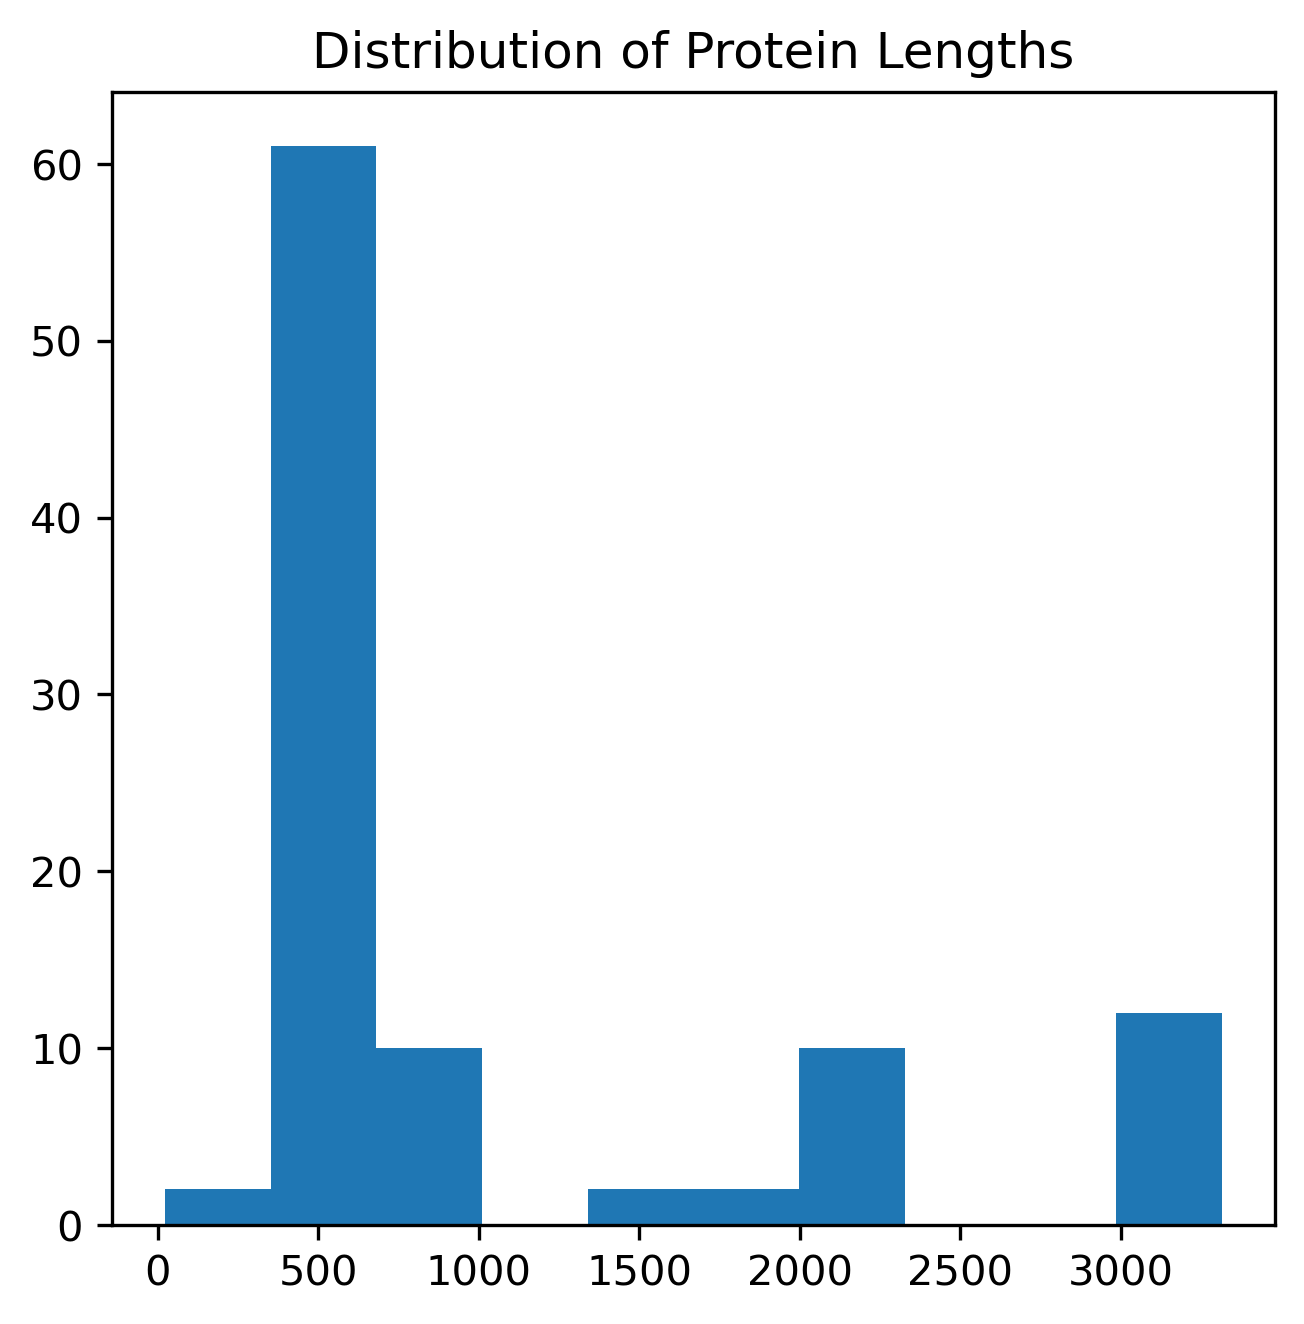

In [64]:
plt.figure(figsize=(5,5), dpi =300);
plt.hist(proteins["length"], bins = 10);
plt.title("Distribution of Protein Lengths");
plt.show()

In [65]:
proteins[proteins["length"] < 150]["length"]

2N1C:A    23
2N30:A    25
Name: length, dtype: int64

### Initial Considerations

2N1C and 2N30 are both of very small proteins, which are probably the derivatives of other structures. Before removing them from consideration, however, it is probably best to review each.

#### 2N1C:A

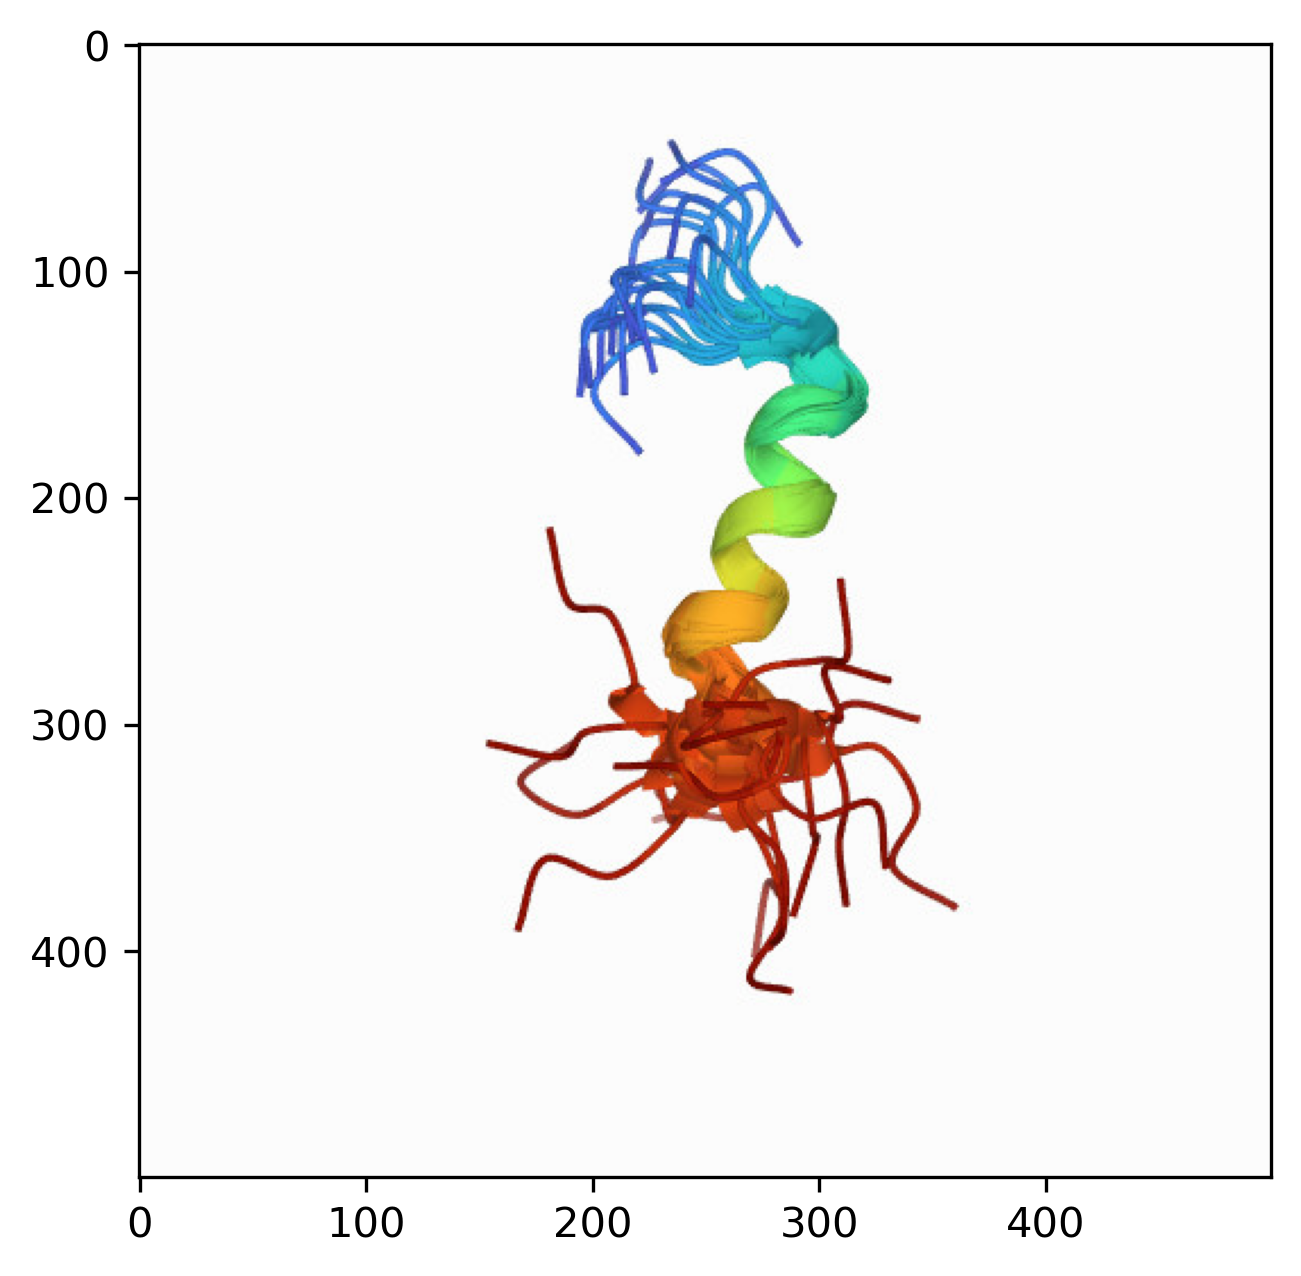

In [67]:
image = mpimg.imread("2n1c_models.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.show();

#### 2N30:A

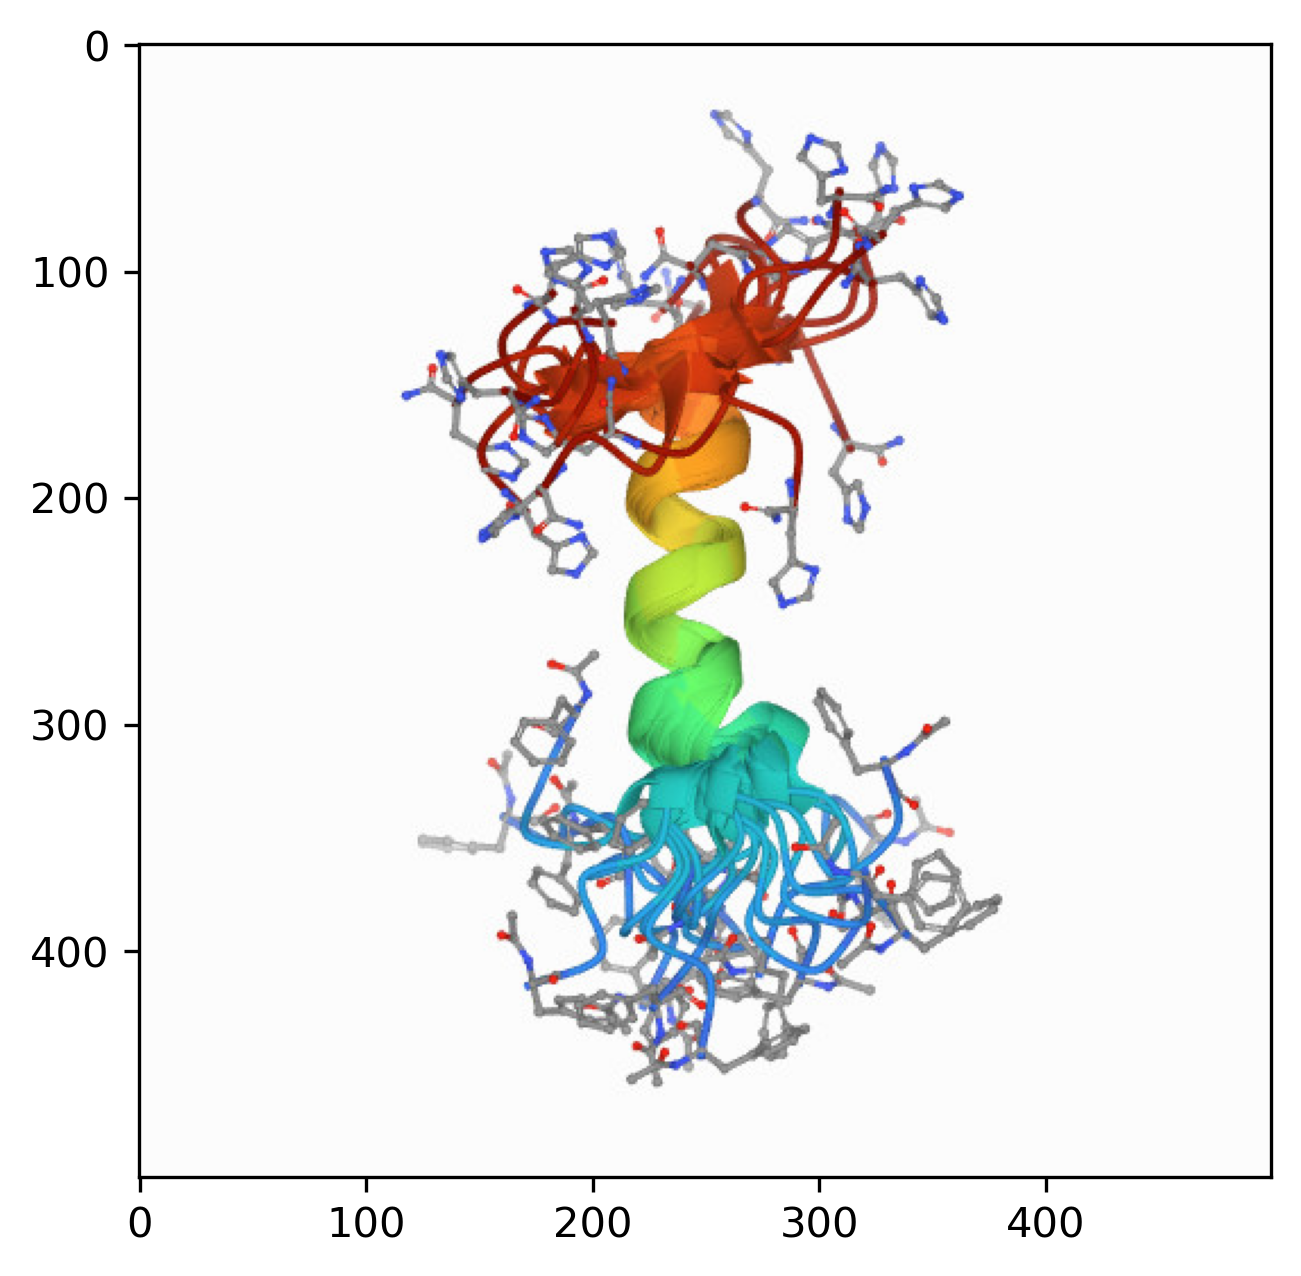

In [68]:
image = mpimg.imread("2n30_models.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.show();

Both of these proteins are derived from crustacean hemocyanins as an anitfungal agents [[4]](https://pubmed.ncbi.nlm.nih.gov/26708991/). Thus it seems reasonable to omit them from the analysis

#### Removal of 2N30 and 2N1C

In [69]:
proteins.drop(["2N1C:A", "2N30:A"], inplace = True)

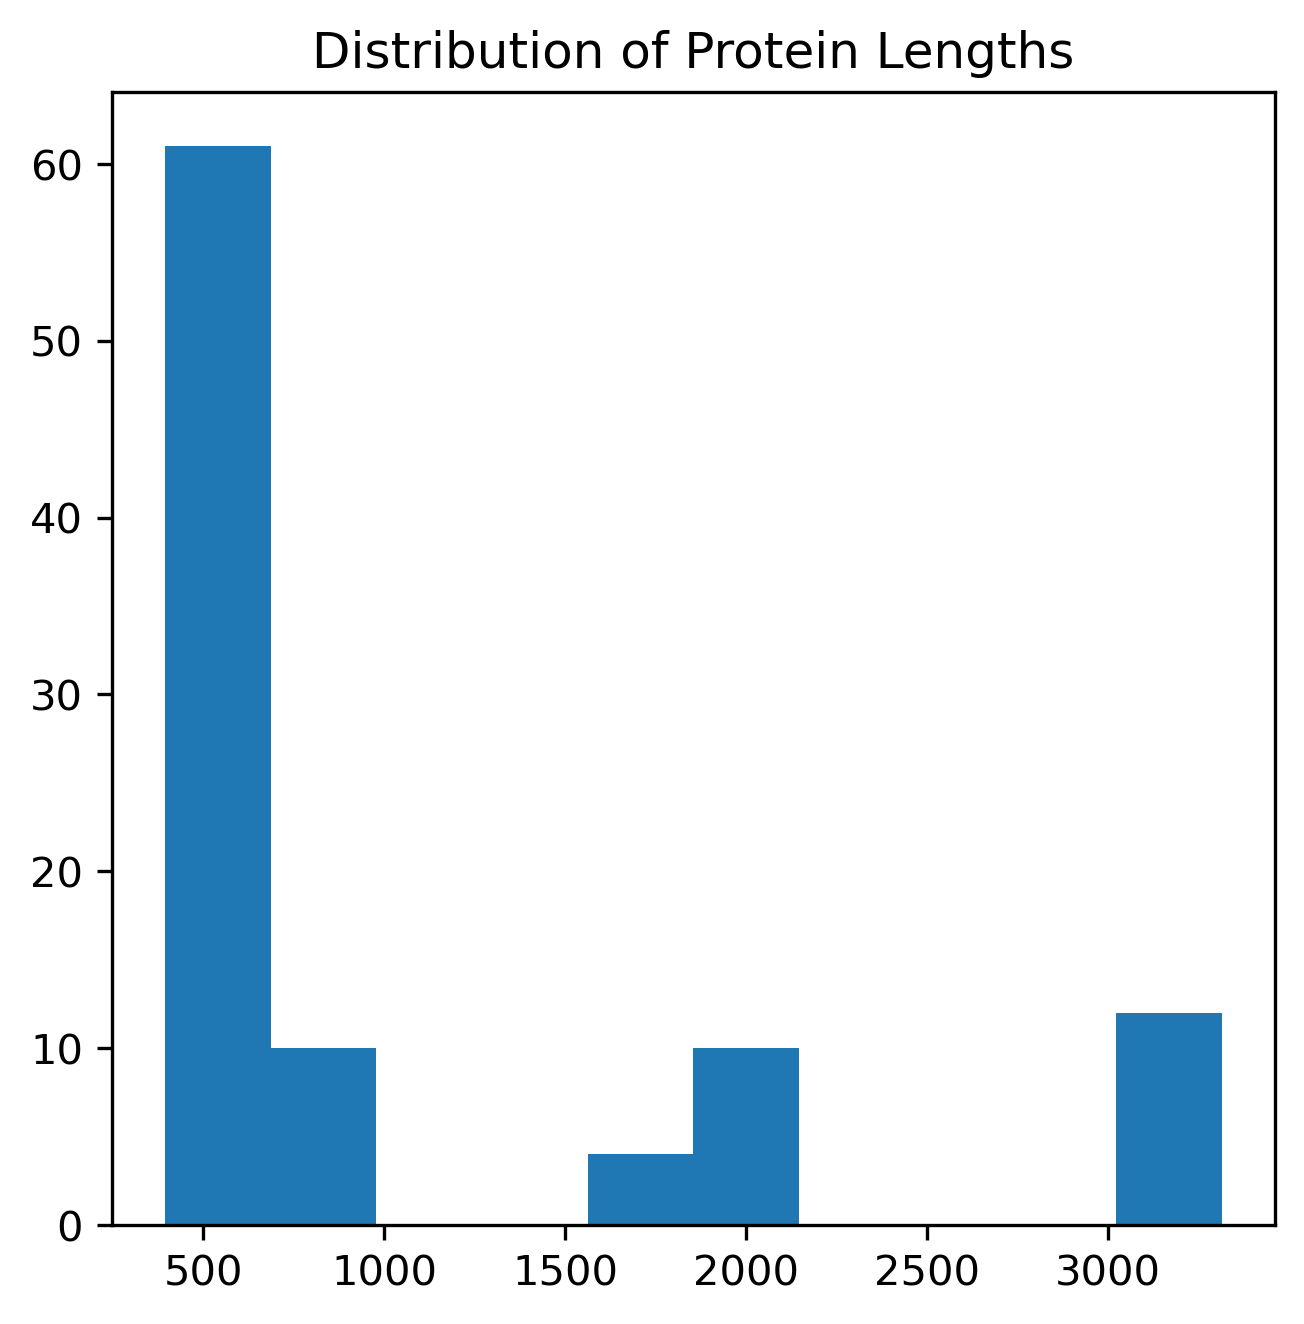

In [70]:
plt.figure(figsize=(5,5), dpi =300);
plt.hist(proteins["length"], bins = 10);
plt.title("Distribution of Protein Lengths");
plt.show()

### Bringing it all together: Protein Frames

#### Protein chains shared by all proteins

In [71]:
protein_list  = list(proteins.index.values)
coexist, amounts = {}, {}
for protein in protein_list:    
    times = {seq:1 for seq, times in proteins["complete"][protein].items()}
    count = {seq:times for seq, times in proteins["complete"][protein].items()}
    for seq in count:
        if seq in coexist:
            coexist[seq] += 1
            amounts[seq] += count[seq]
        else:
            coexist[seq], amounts[seq] = {}, {}
            coexist[seq] = 1
            amounts[seq] = count[seq]
            
coexist = dict(sorted(coexist.items(), key=lambda x: x[1], reverse=True))
amounts = dict(sorted(amounts.items(), key=lambda x: x[1], reverse=True))

In [72]:
proteins["complete"]

1HC1:A     {'D': 54, 'L': 49, 'E': 49, 'G': 47, 'I': 39, ...
1HC1:B     {'D': 54, 'L': 49, 'E': 49, 'G': 47, 'I': 39, ...
1HC1:C     {'D': 54, 'L': 49, 'E': 49, 'G': 47, 'I': 39, ...
1HC1:D     {'D': 54, 'L': 49, 'E': 49, 'G': 47, 'I': 39, ...
1HC1:E     {'D': 54, 'L': 49, 'E': 49, 'G': 47, 'I': 39, ...
                                 ...                        
6R83:5a    {'L': 292, 'A': 230, 'D': 213, 'E': 211, 'S': ...
6R83:6a    {'L': 292, 'A': 230, 'D': 213, 'E': 211, 'S': ...
6R83:7a    {'L': 292, 'A': 230, 'D': 213, 'E': 211, 'S': ...
6R83:8a    {'L': 292, 'A': 230, 'D': 213, 'E': 211, 'S': ...
6R83:9a    {'L': 292, 'A': 230, 'D': 213, 'E': 211, 'S': ...
Name: complete, Length: 97, dtype: object

#### Find amino sequences that occur in at least 55% of hemocyanin proteins

In [73]:
top_55 = int((len(protein_list) * .55)//1)
most_common = {seq:{"times":times,"amount": amounts[seq]} for seq, times in coexist.items() 
                                                          if times > top_55}
len(most_common)

465

#### Create a adjacency matrix for hemocyanin proteins

In [74]:
for protein in proteins["complete"].index:
    for amino in most_common:
        if amino in proteins["complete"][protein]:
            most_common[amino][protein] = 1
        else:
            most_common[amino][protein] = 0

adj = pd.DataFrame.from_dict(most_common).T
adj = adj[adj.columns[2:]]            

### Which protein subunits contain kmr HGM?

#### Contain

In [98]:
adj.loc["HGM"][adj.loc["HGM"] == 1].keys()

Index(['1JS8:A', '1JS8:B', '1LNL:A', '1LNL:B', '1LNL:C', '3J32:A', '3J32:B',
       '3L6W:A', '3L6W:B', '3QJO:A', '3QJO:B', '4BED:A', '4BED:B', '4BED:C',
       '4BED:D', '4YD9:A', '4YD9:B', '4YD9:C', '4YD9:D', '4YD9:E', '4YD9:F',
       '4YD9:G', '4YD9:H', '4YD9:I', '4YD9:J', '4YD9:K', '4YD9:L', '4YD9:M',
       '4YD9:N', '4YD9:O', '4YD9:P', '4YD9:Q', '4YD9:R', '4YD9:S', '4YD9:T',
       '4YD9:U', '4YD9:V', '4YD9:W', '4YD9:X', '4YD9:Y', '4YD9:Z', '4YD9:a',
       '4YD9:b', '4YD9:c', '4YD9:d', '6R83:10a', '6R83:1a', '6R83:2a',
       '6R83:3a', '6R83:4a', '6R83:5a', '6R83:6a', '6R83:7a', '6R83:8a',
       '6R83:9a'],
      dtype='object')

#### Don't contain

In [99]:
adj.loc["HGM"][adj.loc["HGM"] == 0].keys()

Index(['1HC1:A', '1HC1:B', '1HC1:C', '1HC1:D', '1HC1:E', '1HC1:F', '1HCY:A',
       '1HCY:B', '1HCY:C', '1HCY:D', '1HCY:E', '1HCY:F', '1LLA:A', '1NOL:A',
       '1OXY:A', '3IXV:A', '3IXV:C', '3IXV:D', '3IXV:E', '3IXV:F', '3IXV:G',
       '3IXV:H', '3IXV:I', '3IXV:J', '3IXV:K', '3IXV:L', '3IXV:M', '3IXW:A',
       '3IXW:C', '3IXW:D', '3IXW:E', '3IXW:F', '3IXW:G', '3IXW:H', '3IXW:I',
       '3IXW:J', '3IXW:K', '3IXW:L', '3IXW:M', '6L8S:A', '6L8S:B', '6L8S:C'],
      dtype='object')

#### Inclusion Graph

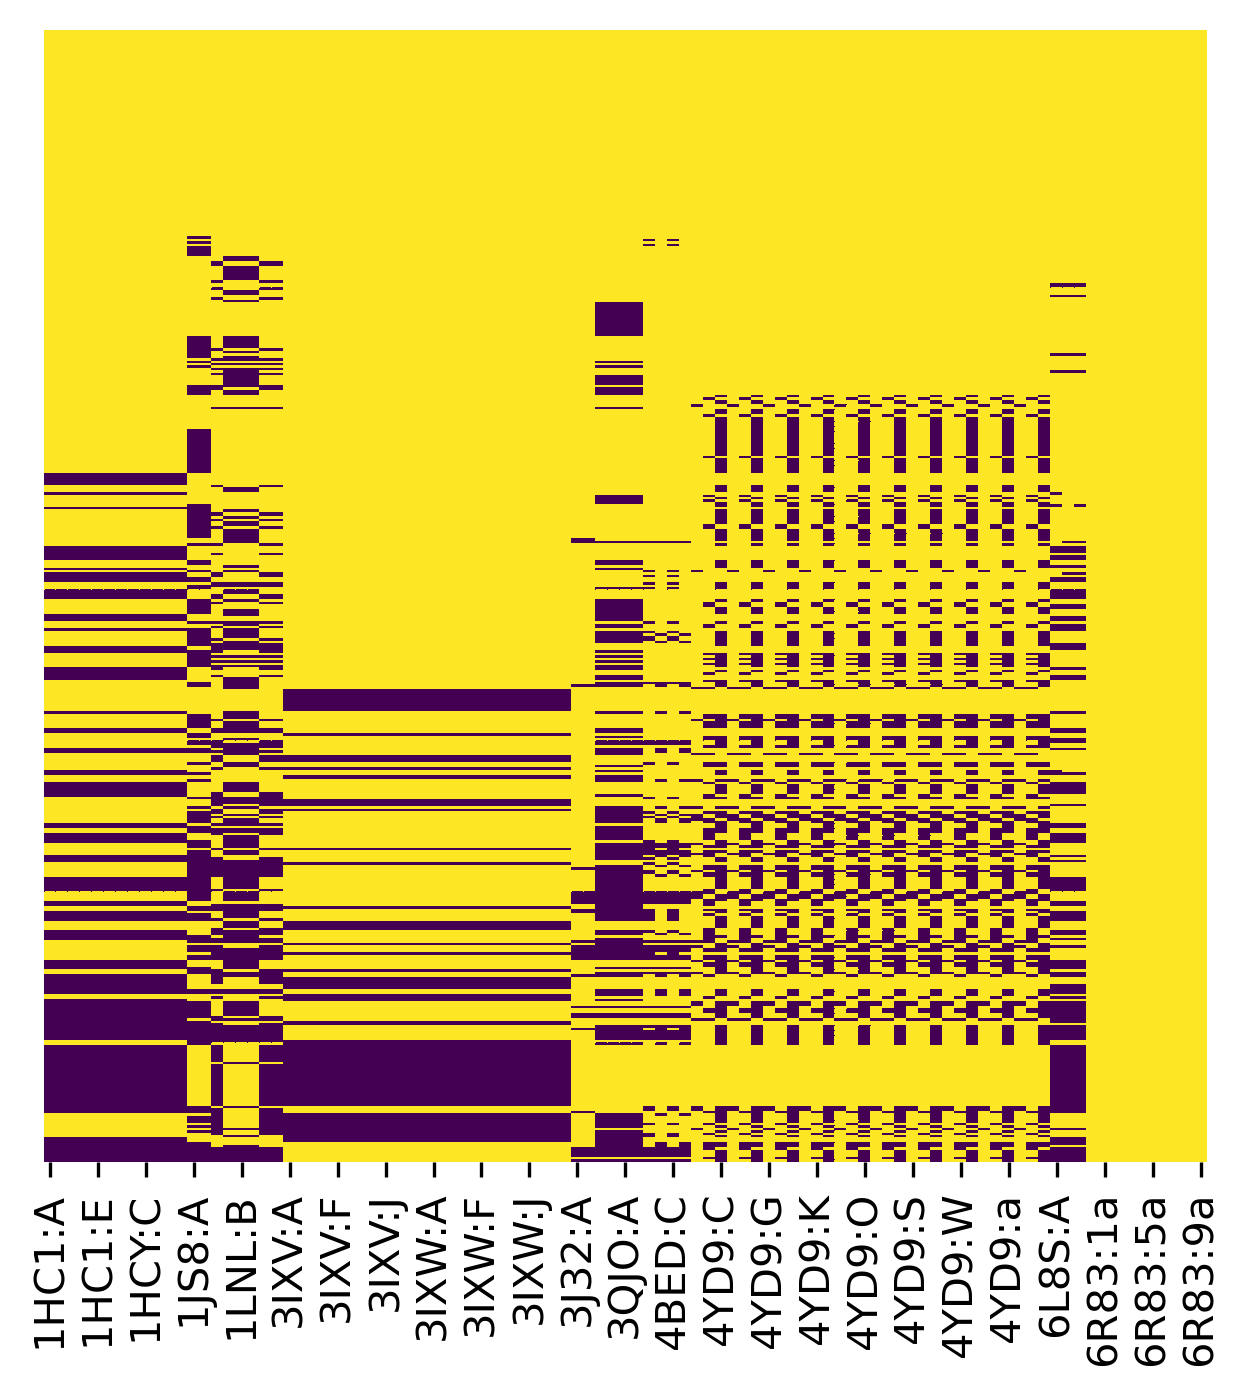

In [76]:
plt.figure(figsize=(5,5), dpi =300);
sns.heatmap(adj,yticklabels=False,cbar=False,cmap='viridis');
plt.show();

In [77]:
proteins["length"].describe()

count      97.000000
mean     1138.144330
std       948.528246
min       394.000000
25%       626.000000
50%       650.000000
75%      1664.000000
max      3314.000000
Name: length, dtype: float64

In [78]:
proteins["length"]["6R83:5a"]

3314

In [79]:
print("Total number of Amino Groups in top 55%:\t\t {}".format(len(most_common)))
print("Total number of those groups represented in 6R83:\t {}".format(adj["6R83:5a"].sum()))

Total number of Amino Groups in top 55%:		 465
Total number of those groups represented in 6R83:	 465


#### Initial Thoughts

From the above information above, 6R83 contains all of the top amino subunits. This is logical, since this protein is largest in the list. 

In [ ]:
larger_items = khl_vs_jfs["shared_count"]

In [ ]:
{k:e for k,e in larger_items.items() if len(k) > 5}

In [ ]:
proteins_dict['4BED:C']["protein"].find("HGMPTFPHWHRLY")

In [ ]:
image = mpimg.imread("unchar.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.title("Uncharacterized?")
plt.axis("off")
plt.show();

## 6R83

### General Information

#### Protein Name

In [ ]:
image = mpimg.imread("6r83_assembly-1.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.title("6R83 Protein")
plt.show();

#### Species Name

In [ ]:
image = mpimg.imread("Todarodes_pacificus.jpg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.title("Todarodes Pacifics (Japanese Flying Squid)")
plt.axis("off")
plt.show();

## Animals listed on NIH Genome List

#### Taxonomy

In [ ]:
pd.DataFrame.from_dict({"kingdom" : "Animalia",
                        "phylum" : "Mollusca",
                        "class" : "Cephalopoda",
                        "order" : "Teuthida",
                        "family" : "Ommastrephidae",
                        "genus" : "Todarodes",
                        "species" : "Todarodes pacificus"}, orient='index', columns = {"entry"})

#### Habitat and Biology

An oceanic and neritic species occurring within abroad temperature range from about 5° to 27° C,  usually in surface waters to 100 m depth and, to a minor extent, down to 500 m depth. <b>During its lifespan of about 1 year</b> a northward migration occurs first, followed by another one in southward direction, usually in close correlation with changes of the main surface currents. Large aggregations occur in small gyres and along oceanic fronts.
Three independently breeding subpopulations can be distinguished in Japanese waters. The main group spawns in winter in the East China Sea, the second in autumn, west of Kyushu, and the third, minor group in spring/summer in the Sea of Japan as well as off northeastern Japan. Postspawning mortality is very high. The males of all 3 subpopulations mature before the females and transfer their spermatophores on the still immature females (in water temperatures of 13 to 18° C). With the progressing southward migration, females mature and spawn 300 to 4 000 small, elliptical or semi-spherical eggs (greatest diameter 0.7 to 0.8 mm) embedded in a gelatinous capsule (egg mass). Spawning occurs usually at water temperatures between 15 and 20°C, and, depending on the temperature, the larvae hatch after an incubation period of 102 to 113 hours.  Growth rates are directly related with temperature and inversely with size. Main food items are myctophids, anchovies (i.e., Engraulis japonicus ), crustaceans, gastropod larvae, and chaetognaths . Cannibalism is common.Predators include rays, dolphins (Coryphaena hippurus, balaen whales, and the northern fur seal).

[1] US. FAO: http://www.fao.org/fishery/species/3567/en Web. 03 Aug. 2020.

## Shotgun alignment

### Pacific Flying Squid

This information was downlaoded from NIH Blast with the following settings:

Search: dbj|AB897790.1 <br>
Max Target: 500 <br>
Short queries: yes <br>
Expect threshold: 10 <br>
Word size: 11 <br>
max matches: 0 <br>
match/mismatch scores: 2,-3 <br>
Gap Costs Existence: 5, Extension: 2 <br>

In [ ]:
from IPython.display import IFrame
IFrame("./BlastTree.pdf", width=600, height=1000)

### Megathura crenulata mRNA for keyhole limpet hemocyanin2 (klh2 gene) Search Parameters

<table id="params" class="dbInfo"> 
				<caption></caption> 
				<tr><th><div>Search parameter name</div></th><th><div>Search parameter value</div></th></tr> 
				<tr><td>Program</td><td>blastn</td></tr><tr><td>Word size</td><td>11</td></tr><tr><td>Expect value</td><td>10</td></tr><tr><td>Hitlist size</td><td>1000</td></tr><tr><td>Match/Mismatch scores</td><td>2,-3</td></tr><tr><td>Gapcosts</td><td>5,2</td></tr><tr><td>Low Complexity Filter</td><td>Yes</td></tr><tr><td>Filter string </td><td>L;m;</td></tr><tr><td>Genetic Code</td><td>1</td></tr>  
				</table> 
<!-- 				 <table id="dbStat" class="dbInfo">
 <caption>Database</caption>
 <tr><th><div>Database parameter name</div></th><th><div>Database parameter value</div></th></tr>
 <tr><td>Posted date</td><td>Aug 17, 2020  8:09 PM</td></tr>
 <tr><td>Number of letters</td><td>317,111,336,329</td></tr>
 <tr><td>Number of sequences</td><td>60,179,710</td></tr>
 <tr><td>Entrez query</td><td>
 <div class="hidden">Includes: </div>
 <div class="hidden">Excludes: </div>
 <div class="">None</div>
 </td></tr> 
 </table>
  
 <table id="Kappa" class="dbInfo show xgl"> 
<caption>Karlin-Altschul statistics</caption> 
 <tr><th><div>Params</div></th><th><div>Ungapped</div></th><th><div>Gapped</div></th></tr>
 <tr><td>Lambda</td><td>0.633731</td><td>0.625</td></tr>
 <tr><td>K</td><td>0.408146</td><td>0.41</td></tr>
 <tr><td>H</td><td>0.912438</td><td>0.78</td></tr> 
 
 </table> 
 
 
 <table class="dbInfo show" >
 <caption>Results Statistics</caption>
 <tr><th><div>Results Statistics parameter name</div></th><th><div>Results Statistics parameter value</div></th></tr>  
 <tr><td>Length adjustment</td><td> 42</td></tr><tr><td>Effective length of query</td><td> 10450</td></tr><tr><td>Effective length of database</td><td> 314583788509</td></tr><tr><td>Effective search space</td><td> 3287400589919050</td></tr><tr><td>Effective search space used</td><td> 3287400589919050</td></tr>
 </table> -->

In [ ]:
from IPython.display import IFrame
IFrame("./keyhole_clade.pdf", width=500, height=500)

In [ ]:
%%bash

cd ../data/keyhold
ls

In [ ]:
genes = {}
khl_fasta = "/media/mruggiero/LaCie/ExtraDrive2/Documents/BioVillage/data/keyhold/250.txt"
for record in SeqIO.parse(khl_fasta, "fasta"):
    print(record.id)
    #     # Create an empty dictionary to populate
#     proteins[record.id.split("|")[0]] = {}
#     entry = proteins[record.id.split("|")[0]]
    
#     # Set values to explore
#     entry["sequence"] = record.id.split("|")[0]
#     entry["family"]  = entry["sequence"].split(":")[0]
#     entry["unit"]    = entry["sequence"].split(":")[1]
#     entry["protein"] = str(record.seq)
#     entry["length"]  = len(entry["protein"])
    
#     indexed_counts = kmers(entry["protein"], kmer_percent = .05)
    
#     for length in indexed_counts:
#         entry[length] = indexed_counts[length]

In [ ]:
record

In [ ]:
# These fasta files are all combined, but if they 
# Were separate, we could use fasta in glob("*.fasta"):

khl_fasta = "250.txt"
with open(khl_fasta) as f:
    # Set output file name
    aligned_output = "{}-aligned.fasta".format(khl_fasta)

    # Apply MAFFT alignement
    from Bio.Align.Applications import MafftCommandline
    mafft_cline = MafftCommandline(input= str(khl_fasta))
    aligned, report = mafft_cline()
    
    # Uncomment to view MAFFT report
    # print(report)
    with open(aligned_output, "w") as handle:
        handle.write(aligned)

In [ ]:
from Bio.Align.Applications import MafftCommandline


In [ ]:
%%bash

cd ..
cd data
cd /media/mruggiero/ExtraDrive2/Documents/BioVillage/data/Octopus_vulgaris/ncbi-genomes-2020-07-23
ls

Using the Mafft algorithm is an option, but is seems to take a long time

In [ ]:
# These fasta files are all combined, but if they 
# Were separate, we could use fasta in glob("*.fasta"):

fasta = "/media/mruggiero/ExtraDrive2/Documents/BioVillage/data/Octopus_vulgaris/"\
        "ncbi-genomes-2020-07-23/GCA_003957725.1_ASM395772v1_genomic.fna"
with open(fasta) as f:
    # Set output file name
    aligned_output = "{}-aligned.fasta".format(fasta)

    # Apply MAFFT alignement
    from Bio.Align.Applications import MafftCommandline
    mafft_cline = MafftCommandline(input= str(fasta))
    aligned, report = mafft_cline()
    
    # Uncomment to view MAFFT report
    # print(report)
    with open(aligned_output, "w") as handle:
        handle.write(aligned)

### Biopython import

Good amount of code form https://www.youtube.com/watch?v=mL8NPpRxgJA

In [ ]:
pdb1 = PDBList()
pdb1.retrieve_pdb_file("6R83")

In [ ]:
%%bash

cd r8; ls

In [ ]:
parser = MMCIFParser()
structure = parser.get_structure("6R83", "r8/6r83.cif")

In [ ]:
methods_in_structure = [a for a in dir(structure) if not a.startswith("_")]
", ".join(methods_in_structure)

In [ ]:
pymol.fetch("6R83")

In [ ]:
dir(pymol)[5:10]

#### PYMOL (still experimental)

In [ ]:
pymol.select('ligand', 'resn MRV')
pymol.show_as('sticks', 'ligand')
pymol.show('spheres', 'ligand')
pymol.set('stick_radius', '.07', 'ligand')
pymol.set('sphere_scale', '.25', 'ligand')
pymol.set('sphere_quality', '4', 'ligand')
pymol.show_as('spheres', '6R83 and not ligand')
pymol.set('sphere_transparency', '.2', '6R83 and not ligand')
pymol.center('ligand')
pymol.orient('ligand')
pymol.zoom('ligand', '10')
pymol.do('rotate z,180; rotate x,90;')
pymol.center('ligand')
pymol.clip('near', '5')
pymol.bg_color('white')
pymol.do('util.cbaw;')
pymol.color('slate', 'elem N')
pymol.set('light_count', '8')
pymol.set('spec_count', '1')
pymol.set('shininess', '10')
pymol.set('specular', '0.25')
pymol.set('ambient', '0')
pymol.set('direct', '0')
pymol.set('reflect', '1.5')
pymol.set('ray_shadow_decay_factor', '0.3')
pymol.set('ray_shadow_decay_range', '1')
pymol.unset('depth_cue')


# Ligand specific
pymol.color('black', 'elem C and ligand')
pymol.set('stick_color', 'white')
pymol.ray()

#pymol.display()


#### NV trouble, not sure what is wrong

In [ ]:
view = nv.show_biopython(structure)
#view.clear_representations()
#view.add_ball_and_stick()

### Align fasta files for Hemocyanin results

In [ ]:
# These fasta files are all combined, but if they 
# Were separate, we could use fasta in glob("*.fasta"):

fasta = "rcsb_model.fasta"
with open("rcsb_model.fasta") as f:
    # Set output file name
    aligned_output = "{}-aligned.fasta".format(fasta)

    # Apply MAFFT alignement
    from Bio.Align.Applications import MafftCommandline
    mafft_cline = MafftCommandline(input= str(fasta))
    aligned, report = mafft_cline()
    
    # Uncomment to view MAFFT report
    # print(report)
    with open(aligned_output, "w") as handle:
        handle.write(aligned)

## Sources

[[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4243888/) Swaminathan, Ashwin et al. “Keyhole limpet haemocyanin - a model antigen for human immunotoxicological studies.” British journal of clinical pharmacology vol. 78,5 (2014): 1135-42. doi:10.1111/bcp.12422

[[2]](https://link.springer.com/article/10.1007/s00018-016-2326-7#citeas) K. Jonsson, T., S. Schreml, R., DB. Allen, J., H. Decker, K., Terwilliger, N., WE. Royer, K., . . . DM. Lorenzini, P. (1988, January 01). Immunological properties of oxygen-transport proteins: Hemoglobin, hemocyanin and hemerythrin. Retrieved September 21, 2020, from https://link.springer.com/article/10.1007/s00018-016-2326-7

[[3]](https://www.wildlifetrusts.org/wildlife-explorer/marine/sea-snails-and-sea-slugs/keyhole-limpet) www.wildlifetrusts.org

[[4]](https://pubmed.ncbi.nlm.nih.gov/26708991/) Petit, Vanessa W., et. al. "A Hemocyanin-derived Antimicrobial Peptide from the Penaeid Shrimp Adopts an Alpha-helical Structure That Specifically Permeabilizes Fungal Membranes." Biochimica Et Biophysica Acta (BBA) - General Subjects 1860.3 (2016): 557-68. Print.